# Part 1 Model a Deep Feed Forward Network for Regression

## 1.Generating Training Data

I have generated the training data according to functions given in the homework. x(n) range (0,1)
y(n) noise = 0.001.

I've used 600 training and 100 test data.

In [1]:
import numpy as np
import random as rnd
import pandas as pd

#define 9 dimensional x (input) numpy array
x = np.zeros(9, np.float64)

#define 5 dimensional y (output) numpy array
y = np.zeros(5, np.float64)

#define y functions
# y[0] = (2 * x[0] * x[1] * x[2]) + (x[3] * x[4]) - (3 * x[5] * x[6] * x[7]) - (7 * x[0] ** 2 * x[7]) + (2 * x[4])
# y[1] = (2 * x[0] * x[4] * x[5]) - (x[2] * x[3] - 3 * x[1] * x[2] * x[3]) - x[2] ** 2 * x[4] - (2 * x[6] * x[7]) + 1
# y[2] = (x[2] ** 2) - (x[4] * x[6]) - (3 * x[0] * x[3] * x[5]) - (12 * x[0] ** 2 * x[1] * x[3]) - 2
# y[3] = (x[5] ** 3) - (5 * x[0] * x[2] * x[7]) - (x[0] * x[3] * x[6]) - (2 * x[4] ** 2 * x[1] * x[3]) - 3 * x[7]
# y[4] = (x[2] ** 2 * x[4]) - (2 * x[2] * x[3] * x[7]) - (x[0] * x[1] * x[3]) - (3 * x[5]) + (x[0] ** 2 * x[6]) - 1

fh = open("training_data.txt","w")


#generate random inputs for every iteration
def generate_random_x():
    for index, x_i in enumerate(x):
        #x[index] = rnd.uniform(0, 100)
        x[index] = rnd.random()
        # x[index] = rnd.randint(0, 10000)
        
def calculate_y():
    generate_random_x()
    # y1 = 2*x1 * x2 * x3 + x4 * x5 - 3*x6 * x7 * x8 - 7*x1^2 * x8 + 2*x5
    # if index == 0:
    y[0] = (2 * x[0] * x[1] * x[2]) + (x[3] * x[4]) - (3 * x[5] * x[6] * x[7]) - (7 * x[0] ** 2 * x[7]) + (2 * x[4])
    # elif index == 1:
    y[1] = (2 * x[0] * x[4] * x[5]) - (x[2] * x[3] - 3 * x[1] * x[2] * x[3]) - x[2] ** 2 * x[4] - (
            2 * x[6] * x[7]) + 1
    # elif index == 2:
    y[2] = (x[2] ** 2) - (x[4] * x[6]) - (3 * x[0] * x[3] * x[5]) - (12 * x[0] ** 2 * x[1] * x[3]) - 2
    # elif index == 3:
    y[3] = (x[5] ** 3) - (5 * x[0] * x[2] * x[7]) - (x[0] * x[3] * x[6]) - (2 * x[4] ** 2 * x[1] * x[3]) - 3 * x[7]
    # elif index == 4:
    y[4] = (x[2] ** 2 * x[4]) - (2 * x[2] * x[3] * x[7]) - (x[0] * x[1] * x[3]) - (3 * x[5]) + (
            x[0] ** 2 * x[6]) - 1

    # write x to file
    for x_i in x:
        fh.write(str(x_i))
        fh.write(" ")

    # write y to file
    for y_i in range(0, 5, 1):
        # if index == y_i:
        # some noise added.
        y[y_i] += y[y_i] * 0.001
        fh.write(str(y[y_i]))
        # else:
        #    fh.write("0")

        if y_i != 4:
            fh.write(" ")

    # fh.write(' y' + str(index))
    fh.write("\n")

#generate 600 training samples.
for i in range(0, 120, 1):

    for j in range(0, 5, 1):
        calculate_y()

fh.close()

column_names = ['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'y0', 'y1', 'y2', 'y3', 'y4']

df = pd.read_csv("training_data.txt", header=None, delimiter=' ')

df.columns = column_names

df.head()






,x0,x1,x2,x3,x4,x5,x6,x7,x8,y0,y1,y2,y3,y4
0,0.830197,0.405060,0.810531,0.534717,0.074752,0.152219,0.940788,0.597202,0.913253,-2.405616,-0.060698,-3.410864,-4.221637,-1.458062
1,0.973353,0.199305,0.669345,0.676851,0.949700,0.678318,0.218934,0.236650,0.676503,1.128159,1.544336,-4.638862,-1.557873,-2.750525
2,0.827533,0.052860,0.579171,0.407109,0.575590,0.942033,0.329652,0.176601,0.017851,0.425506,1.390903,-2.986235,-0.242590,-3.511871
3,0.704136,0.693992,0.119481,0.553727,0.163137,0.158602,0.480594,0.919685,0.675119,-2.871702,0.221924,-4.540541,-3.353122,-1.629102
4,0.808557,0.393863,0.702464,0.576224,0.912895,0.940665,0.419981,0.376427,0.110196,0.631071,1.697203,-4.990213,-1.941839,-3.588780


## 2.Generating Test Data

In [2]:

fh_test = open("test_data.txt", "w")

def calculate_test_y():
    generate_random_x()
    # y1 = 2*x1 * x2 * x3 + x4 * x5 - 3*x6 * x7 * x8 - 7*x1^2 * x8 + 2*x5
    # if index == 0:
    y[0] = (2 * x[0] * x[1] * x[2]) + (x[3] * x[4]) - (3 * x[5] * x[6] * x[7]) - (7 * x[0] ** 2 * x[7]) + (2 * x[4])
    # elif index == 1:
    y[1] = (2 * x[0] * x[4] * x[5]) - (x[2] * x[3] - 3 * x[1] * x[2] * x[3]) - x[2] ** 2 * x[4] - (
            2 * x[6] * x[7]) + 1
    # elif index == 2:
    y[2] = (x[2] ** 2) - (x[4] * x[6]) - (3 * x[0] * x[3] * x[5]) - (12 * x[0] ** 2 * x[1] * x[3]) - 2
    # elif index == 3:
    y[3] = (x[5] ** 3) - (5 * x[0] * x[2] * x[7]) - (x[0] * x[3] * x[6]) - (2 * x[4] ** 2 * x[1] * x[3]) - 3 * x[7]
    # elif index == 4:
    y[4] = (x[2] ** 2 * x[4]) - (2 * x[2] * x[3] * x[7]) - (x[0] * x[1] * x[3]) - (3 * x[5]) + (
            x[0] ** 2 * x[6]) - 1

    # write x to file
    for x_i in x:
        fh_test.write(str(x_i))
        fh_test.write(" ")

    # write y to file
    for y_i in range(0, 5, 1):
        # if index == y_i:
        fh_test.write(str(y[y_i]))
        # else:
        #    fh.write("0")

        if y_i != 4:
            fh_test.write(" ")

    # fh.write(' y' + str(index))
    fh_test.write("\n")
    
#generate 100 test samples.    
for i in range(0, 20, 1):
    for j in range(0, 5, 1):
        calculate_test_y()

fh_test.close()
    
df_test = pd.read_csv("test_data.txt", header=None, delimiter=' ')

df_test.columns = column_names

df_test.head()



,x0,x1,x2,x3,x4,x5,x6,x7,x8,y0,y1,y2,y3,y4
0,0.245465,0.806462,0.168295,0.288156,0.192200,0.481675,0.855922,0.547640,0.692298,-0.401903,0.171365,-2.406420,-1.721992,-2.498168
1,0.789376,0.066095,0.803115,0.450522,0.252928,0.358469,0.830949,0.388864,0.381966,-1.340031,0.043673,-2.170280,-2.652472,-1.699399
2,0.657389,0.191691,0.915481,0.918482,0.406989,0.605684,0.018028,0.582669,0.566281,-0.363213,0.604693,-3.179427,-3.348355,-3.563785
3,0.380789,0.518216,0.065146,0.537759,0.575871,0.159791,0.166783,0.267672,0.796949,1.194045,0.997780,-2.674861,-1.051122,-1.577618
4,0.016613,0.445442,0.462649,0.432000,0.295861,0.289448,0.719912,0.832413,0.359258,0.204406,-0.191790,-2.005819,-2.543834,-2.140753


## 3. Loading Training and Test Datasets

In [3]:
#load training dataset
training_dataset = np.loadtxt("training_data.txt", delimiter=' ')

X_Train = training_dataset[:, 0:9]
Y_Train = training_dataset[:, 9:14]

#load test dataset
test_dataset = np.loadtxt("test_data.txt", delimiter=' ')

X_Test = test_dataset[:, 0:9]
Y_Test = test_dataset[:, 9:14]

## 4. Creating Model
We have 9 inputs and 5 outputs.

In [4]:
from tensorflow.python.keras import Sequential
from tensorflow.python.keras import optimizers
from tensorflow.python.keras.layers.core import Dense, Activation

#set different parameters here.
def generate_and_train_model(X_Train,Y_Train,X_Test,Y_Test,activation,hidden_1,hidden_2,hidden_3,learning_rate,epoch_size):

    model = Sequential()
    model.add(Dense(9, input_dim=9))
    model.add(Activation(activation))
    model.add(Dense(hidden_1))
    model.add(Activation(activation))
    model.add(Dense(hidden_2))
    model.add(Activation(activation))
    model.add(Dense(hidden_3))
    model.add(Activation(activation))
    model.add(Dense(5))
    model.add(Activation('linear'))

    model.summary()

    sgd = optimizers.SGD(lr=learning_rate)
    model.compile(loss='mean_squared_error', optimizer=sgd)
    model.fit(X_Train, Y_Train, epochs=epoch_size, verbose=0)

    training_scores = model.evaluate(X_Train, Y_Train)

    test_scores = model.evaluate(X_Test, Y_Test)

    print("Epoch_size: " + str(epoch_size))
    print("Learning Rate: " + str(learning_rate))
    print("Activation " + str(activation))
    print("Hidden_1 " + str(hidden_1))
    print("Hidden_2 " + str(hidden_2))
    print("Hidden_3 " + str(hidden_3))

    print("Train Loss: %f" % training_scores)
    print("Test Loss: %f " % test_scores)
    
    
generate_and_train_model(X_Train, Y_Train, X_Test, Y_Test, "tanh", 4, 4, 4, 0.01, 500)
generate_and_train_model(X_Train, Y_Train, X_Test, Y_Test, "tanh", 4, 4, 4, 0.01, 1000)
generate_and_train_model(X_Train, Y_Train, X_Test, Y_Test, "tanh", 4, 4, 4, 0.01, 1500)
generate_and_train_model(X_Train, Y_Train, X_Test, Y_Test, "tanh", 4, 4, 4, 0.1, 500)
generate_and_train_model(X_Train, Y_Train, X_Test, Y_Test, "tanh", 4, 4, 4, 0.1, 1000)
generate_and_train_model(X_Train, Y_Train, X_Test, Y_Test, "tanh", 4, 4, 4, 0.1, 1500)
generate_and_train_model(X_Train, Y_Train, X_Test, Y_Test, "tanh", 4, 4, 4, 0.5, 500)
generate_and_train_model(X_Train, Y_Train, X_Test, Y_Test, "tanh", 4, 4, 4, 0.5, 1000)
generate_and_train_model(X_Train, Y_Train, X_Test, Y_Test, "tanh", 4, 4, 4, 0.5, 1500)
generate_and_train_model(X_Train, Y_Train, X_Test, Y_Test, "relu", 4, 4, 4, 0.01, 500)
generate_and_train_model(X_Train, Y_Train, X_Test, Y_Test, "relu", 4, 4, 4, 0.01, 1000)
generate_and_train_model(X_Train, Y_Train, X_Test, Y_Test, "relu", 4, 4, 4, 0.01, 1500)
generate_and_train_model(X_Train, Y_Train, X_Test, Y_Test, "relu", 4, 4, 4, 0.1, 500)
generate_and_train_model(X_Train, Y_Train, X_Test, Y_Test, "relu", 4, 4, 4, 0.1, 1000)
generate_and_train_model(X_Train, Y_Train, X_Test, Y_Test, "relu", 4, 4, 4, 0.1, 1500)
generate_and_train_model(X_Train, Y_Train, X_Test, Y_Test, "sigmoid", 4, 4, 4, 0.1, 500)
generate_and_train_model(X_Train, Y_Train, X_Test, Y_Test, "sigmoid", 4, 4, 4, 0.1, 1000)
generate_and_train_model(X_Train, Y_Train, X_Test, Y_Test, "sigmoid", 4, 4, 4, 0.1, 1500)
generate_and_train_model(X_Train, Y_Train, X_Test, Y_Test, "sigmoid", 4, 4, 4, 0.01, 1000)
generate_and_train_model(X_Train, Y_Train, X_Test, Y_Test, "sigmoid", 4, 4, 4, 0.2, 1500)





_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 9)                 90        
_________________________________________________________________
activation (Activation)      (None, 9)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 40        
_________________________________________________________________
activation_1 (Activation)    (None, 4)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 20        
_________________________________________________________________
activation_2 (Activation)    (None, 4)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 20        
__________

100/100 [==============================] - 0s 40us/step
Epoch_size: 1000
Learning Rate: 0.1
Activation tanh
Hidden_1 4
Hidden_2 4
Hidden_3 4
Train Loss: 0.210092
Test Loss: 0.220436 
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 9)                 90        
_________________________________________________________________
activation_25 (Activation)   (None, 9)                 0         
_________________________________________________________________
dense_26 (Dense)             (None, 4)                 40        
_________________________________________________________________
activation_26 (Activation)   (None, 4)                 0         
_________________________________________________________________
dense_27 (Dense)             (None, 4)                 20        
_________________________________________________________________
activation_27 (Activation

100/100 [==============================] - 0s 22us/step
Epoch_size: 500
Learning Rate: 0.01
Activation relu
Hidden_1 4
Hidden_2 4
Hidden_3 4
Train Loss: 0.497588
Test Loss: 0.486522 
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_50 (Dense)             (None, 9)                 90        
_________________________________________________________________
activation_50 (Activation)   (None, 9)                 0         
_________________________________________________________________
dense_51 (Dense)             (None, 4)                 40        
_________________________________________________________________
activation_51 (Activation)   (None, 4)                 0         
_________________________________________________________________
dense_52 (Dense)             (None, 4)                 20        
_________________________________________________________________
activation_52 (Activation

100/100 [==============================] - 0s 29us/step
Epoch_size: 1500
Learning Rate: 0.1
Activation relu
Hidden_1 4
Hidden_2 4
Hidden_3 4
Train Loss: 1.100258
Test Loss: 1.000623 
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_75 (Dense)             (None, 9)                 90        
_________________________________________________________________
activation_75 (Activation)   (None, 9)                 0         
_________________________________________________________________
dense_76 (Dense)             (None, 4)                 40        
_________________________________________________________________
activation_76 (Activation)   (None, 4)                 0         
_________________________________________________________________
dense_77 (Dense)             (None, 4)                 20        
_________________________________________________________________
activation_77 (Activation

100/100 [==============================] - 0s 32us/step
Epoch_size: 1500
Learning Rate: 0.2
Activation sigmoid
Hidden_1 4
Hidden_2 4
Hidden_3 4
Train Loss: 0.171550
Test Loss: 0.186467 


| Data Size | Input Node | Input Act | Dense-1 | Dense-1 Act | Dense-2 | Dense-2 Act | Dense-3 | Dense-3 Act | Output Node | Output Act | L.Rate | Epoch | Train Error | Test Error |
|:---------:|:----------:|:---------:|:-------:|:-----------:|:-------:|:-----------:|:-------:|:-----------:|:-----------:|:----------:|:------:|:-----:|:-----------:|:----------:|
|    600    |      9     |    tanh   |    4    |     tanh    |    4    |     tanh    |    4    |     tanh    |      5      |   linear   |  0.01  |  1000 |   0.242384  |  0.296860  |
|    600    |      9     |    tanh   |    4    |     tanh    |    4    |     tanh    |    4    |     tanh    |      5      |   linear   |  0.01  |  1500 |   0.126778  |  0.167803  |
|    600    |      9     |    tanh   |    4    |     tanh    |    4    |     tanh    |    4    |     tanh    |      5      |   linear   |  0.01  |  2000 |   0.217331  |  0.260438  |
|    600    |      9     |    tanh   |    4    |     tanh    |    4    |     tanh    |    4    |     tanh    |      5      |   linear   |   0.1  |  1000 |   0.218391  |  0.280169  |
|    600    |      9     |    tanh   |    4    |     tanh    |    4    |     tanh    |    4    |     tanh    |      5      |   linear   |   0.1  |  1500 |   0.190859  |  0.242867  |
|    600    |      9     |    tanh   |    4    |     tanh    |    4    |     tanh    |    4    |     tanh    |      5      |   linear   |   0.1  |  2000 |   0.179826  |  0.242151  |
|    600    |      9     |    tanh   |    4    |     tanh    |    4    |     tanh    |    4    |     tanh    |      5      |   linear   |   0.5  |  1000 |   0.410062  |  0.473462  |
|    600    |      9     |    tanh   |    4    |     tanh    |    4    |     tanh    |    4    |     tanh    |      5      |   linear   |   0.5  |  1500 |   0.569335  |  0.677881  |
|    600    |      9     |    tanh   |    4    |     tanh    |    4    |     tanh    |    4    |     tanh    |      5      |   linear   |   0.5  |  2000 |   0.345615  |  0.403062  |
|    600    |      9     |    relu   |    4    |     relu    |    4    |     relu    |    4    |     relu    |      5      |   linear   |  0.01  |  1000 |   1.822732  |  2.347571  |
|    600    |      9     |    relu   |    4    |     relu    |    4    |     relu    |    4    |     relu    |      5      |   linear   |  0.01  |  1500 |   0.805988  |  0.992025  |
|    600    |      9     |    relu   |    4    |     relu    |    4    |     relu    |    4    |     relu    |      5      |   linear   |  0.01  |  2000 |   0.462038  |  0.488292  |
|    600    |      9     |    relu   |    4    |     tanh    |    4    |     relu    |    4    |     tanh    |      5      |   linear   |  0.01  |  1000 |   0.283931  |  0.325317  |
|    600    |      9     |    relu   |    4    |     tanh    |    4    |     relu    |    4    |     tanh    |      5      |   linear   |  0.01  |  1500 |   0.397254  |  0.421426  |
|    600    |      9     |    relu   |    4    |     tanh    |    4    |     relu    |    4    |     tanh    |      5      |   linear   |  0.01  |  2000 |   0.230768  |  0.269217  |

## Adding New Nodes to Hidden Layers

In [5]:
generate_and_train_model(X_Train, Y_Train, X_Test, Y_Test, "tanh", 6, 4, 4, 0.1, 1000)
generate_and_train_model(X_Train, Y_Train, X_Test, Y_Test, "tanh", 6, 6, 4, 0.1, 1000)
generate_and_train_model(X_Train, Y_Train, X_Test, Y_Test, "tanh", 6, 6, 6, 0.1, 1000)
generate_and_train_model(X_Train, Y_Train, X_Test, Y_Test, "tanh", 8, 6, 6, 0.1, 1000)
generate_and_train_model(X_Train, Y_Train, X_Test, Y_Test, "tanh", 8, 8, 6, 0.1, 1000)
generate_and_train_model(X_Train, Y_Train, X_Test, Y_Test, "tanh", 8, 8, 8, 0.1, 1000)
generate_and_train_model(X_Train, Y_Train, X_Test, Y_Test, "tanh", 10, 8, 8, 0.1, 1000)
generate_and_train_model(X_Train, Y_Train, X_Test, Y_Test, "tanh", 10, 10, 8, 0.1, 1000)
generate_and_train_model(X_Train, Y_Train, X_Test, Y_Test, "tanh", 10, 10, 10, 0.1, 1000)
generate_and_train_model(X_Train, Y_Train, X_Test, Y_Test, "tanh", 12, 10, 10, 0.1, 1000)
generate_and_train_model(X_Train, Y_Train, X_Test, Y_Test, "tanh", 12, 12, 10, 0.1, 1000)
generate_and_train_model(X_Train, Y_Train, X_Test, Y_Test, "tanh", 12, 12, 12, 0.1, 1000)
generate_and_train_model(X_Train, Y_Train, X_Test, Y_Test, "tanh", 14, 12, 12, 0.1, 1000)
generate_and_train_model(X_Train, Y_Train, X_Test, Y_Test, "tanh", 14, 14, 12, 0.1, 1000)
generate_and_train_model(X_Train, Y_Train, X_Test, Y_Test, "tanh", 14, 14, 14, 0.1, 1000)
generate_and_train_model(X_Train, Y_Train, X_Test, Y_Test, "tanh", 16, 14, 14, 0.1, 1000)
generate_and_train_model(X_Train, Y_Train, X_Test, Y_Test, "tanh", 16, 16, 16, 0.1, 1000)
generate_and_train_model(X_Train, Y_Train, X_Test, Y_Test, "tanh", 18, 16, 16, 0.1, 1000)
generate_and_train_model(X_Train, Y_Train, X_Test, Y_Test, "tanh", 18, 18, 18, 0.1, 1000)
generate_and_train_model(X_Train, Y_Train, X_Test, Y_Test, "tanh", 20, 18, 18, 0.1, 1000)
generate_and_train_model(X_Train, Y_Train, X_Test, Y_Test, "tanh", 20, 20, 18, 0.1, 1000)
generate_and_train_model(X_Train, Y_Train, X_Test, Y_Test, "tanh", 20, 20, 20, 0.1, 1000)



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_100 (Dense)            (None, 9)                 90        
_________________________________________________________________
activation_100 (Activation)  (None, 9)                 0         
_________________________________________________________________
dense_101 (Dense)            (None, 6)                 60        
_________________________________________________________________
activation_101 (Activation)  (None, 6)                 0         
_________________________________________________________________
dense_102 (Dense)            (None, 4)                 28        
_________________________________________________________________
activation_102 (Activation)  (None, 4)                 0         
_________________________________________________________________
dense_103 (Dense)            (None, 4)                 20        
__________

100/100 [==============================] - 0s 35us/step
Epoch_size: 1000
Learning Rate: 0.1
Activation tanh
Hidden_1 8
Hidden_2 8
Hidden_3 6
Train Loss: 0.101614
Test Loss: 0.107846 
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_125 (Dense)            (None, 9)                 90        
_________________________________________________________________
activation_125 (Activation)  (None, 9)                 0         
_________________________________________________________________
dense_126 (Dense)            (None, 8)                 80        
_________________________________________________________________
activation_126 (Activation)  (None, 8)                 0         
_________________________________________________________________
dense_127 (Dense)            (None, 8)                 72        
_________________________________________________________________
activation_127 (Activatio

100/100 [==============================] - 0s 28us/step
Epoch_size: 1000
Learning Rate: 0.1
Activation tanh
Hidden_1 12
Hidden_2 10
Hidden_3 10
Train Loss: 0.042226
Test Loss: 0.053065 
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_150 (Dense)            (None, 9)                 90        
_________________________________________________________________
activation_150 (Activation)  (None, 9)                 0         
_________________________________________________________________
dense_151 (Dense)            (None, 12)                120       
_________________________________________________________________
activation_151 (Activation)  (None, 12)                0         
_________________________________________________________________
dense_152 (Dense)            (None, 12)                156       
_________________________________________________________________
activation_152 (Activa

100/100 [==============================] - 0s 26us/step
Epoch_size: 1000
Learning Rate: 0.1
Activation tanh
Hidden_1 14
Hidden_2 14
Hidden_3 14
Train Loss: 0.051212
Test Loss: 0.076704 
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_175 (Dense)            (None, 9)                 90        
_________________________________________________________________
activation_175 (Activation)  (None, 9)                 0         
_________________________________________________________________
dense_176 (Dense)            (None, 16)                160       
_________________________________________________________________
activation_176 (Activation)  (None, 16)                0         
_________________________________________________________________
dense_177 (Dense)            (None, 14)                238       
_________________________________________________________________
activation_177 (Activa

100/100 [==============================] - 0s 40us/step
Epoch_size: 1000
Learning Rate: 0.1
Activation tanh
Hidden_1 20
Hidden_2 18
Hidden_3 18
Train Loss: 0.012109
Test Loss: 0.022863 
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_200 (Dense)            (None, 9)                 90        
_________________________________________________________________
activation_200 (Activation)  (None, 9)                 0         
_________________________________________________________________
dense_201 (Dense)            (None, 20)                200       
_________________________________________________________________
activation_201 (Activation)  (None, 20)                0         
_________________________________________________________________
dense_202 (Dense)            (None, 20)                420       
_________________________________________________________________
activation_202 (Activa

I have add 2 node every time and the result is:

| Data Size | Input Node | Input Act | Dense-1 | Dense-1 Act | Dense-2 | Dense-2 Act | Dense-3 | Dense-3 Act | Output Node | Output Act | L.Rate | Epoch | Train Error | Test Error |
|:---------:|:----------:|:---------:|:-------:|:-----------:|:-------:|:-----------:|:-------:|:-----------:|:-----------:|:----------:|:------:|:-----:|:-----------:|:----------:|
|    600    |      9     |    tanh   |    6    |     tanh    |    4    |     tanh    |    4    |     tanh    |      5      |   linear   |  0.01  |  1000 |   0.230664  |  0.284872  |
|    600    |      9     |    tanh   |    6    |     tanh    |    6    |     tanh    |    4    |     tanh    |      5      |   linear   |  0.01  |  1000 |   0.107739  |  0.147939  |
|    600    |      9     |    tanh   |    6    |     tanh    |    6    |     tanh    |    6    |     tanh    |      5      |   linear   |  0.01  |  1000 |   0.106117  |  0.138951  |
|    625    |      9     |    tanh   |    6    |     tanh    |    6    |     tanh    |    6    |     tanh    |      5      |   linear   |  0.01  |  1000 |   0.100039  |  0.105181  |
|    600    |      9     |    tanh   |    8    |     tanh    |    6    |     tanh    |    6    |     tanh    |      5      |   linear   |  0.01  |  1000 |   0.103422  |  0.135032  |
|    600    |      9     |    tanh   |    8    |     tanh    |    8    |     tanh    |    6    |     tanh    |      5      |   linear   |  0.01  |  1000 |   0.078349  |  0.112605  |
|    600    |      9     |    tanh   |    8    |     tanh    |    8    |     tanh    |    8    |     tanh    |      5      |   linear   |  0.01  |  1000 |   0.061360  |  0.086895  |
|    600    |      9     |    tanh   |    10   |     tanh    |    8    |     tanh    |    8    |     tanh    |      5      |   linear   |  0.01  |  1000 |   0.214529  |  0.275568  |
|    600    |      9     |    tanh   |    10   |     tanh    |    10   |     tanh    |    8    |     tanh    |      5      |   linear   |  0.01  |  1000 |   0.066961  |  0.108347  |
|    600    |      9     |    tanh   |    10   |     tanh    |    10   |     tanh    |    10   |     tanh    |      5      |   linear   |  0.01  |  1000 |   0.041627  |  0.073066  |
|    600    |      9     |    tanh   |    12   |     tanh    |    10   |     tanh    |    10   |     tanh    |      5      |   linear   |  0.01  |  1000 |   0.038032  |  0.060367  |
|    600    |      9     |    tanh   |    12   |     tanh    |    12   |     tanh    |    10   |     tanh    |      5      |   linear   |  0.01  |  1000 |   0.042953  |  0.079595  |
|    600    |      9     |    tanh   |    12   |     tanh    |    12   |     tanh    |    12   |     tanh    |      5      |   linear   |  0.01  |  1000 |   0.034023  |  0.069341  |
|    600    |      9     |    tanh   |    14   |     tanh    |    12   |     tanh    |    12   |     tanh    |      5      |   linear   |  0.01  |  1000 |   0.028721  |  0.051455  |
|    600    |      9     |    tanh   |    14   |     tanh    |    14   |     tanh    |    12   |     tanh    |      5      |   linear   |  0.01  |  1000 |   0.029594  |  0.058277  |
|    600    |      9     |    tanh   |    14   |     tanh    |    14   |     tanh    |    14   |     tanh    |      5      |   linear   |  0.01  |  1000 |   0.055583  |  0.075554  |
|    600    |      9     |    tanh   |    16   |     tanh    |    14   |     tanh    |    14   |     tanh    |      5      |   linear   |  0.01  |  1000 |   0.030893  |  0.048610  |
|    600    |      9     |    tanh   |    16   |     tanh    |    16   |     tanh    |    16   |     tanh    |      5      |   linear   |  0.01  |  1000 |   0.025738  |  0.061128  |
|    600    |      9     |    tanh   |    18   |     tanh    |    16   |     tanh    |    16   |     tanh    |      5      |   linear   |  0.01  |  1000 |   0.031345  |  0.062981  |
|    600    |      9     |    tanh   |    18   |     tanh    |    18   |     tanh    |    18   |     tanh    |      5      |   linear   |  0.01  |  1000 |   0.048698  |  0.083283  |
|    600    |      9     |    tanh   |    20   |     tanh    |    18   |     tanh    |    18   |     tanh    |      5      |   linear   |  0.01  |  1000 |   0.028212  |  0.048121  |
|    600    |      9     |    tanh   |    20   |     tanh    |    20   |     tanh    |    18   |     tanh    |      5      |   linear   |  0.01  |  1000 |   0.015122  |  0.036735  |
|    600    |      9     |    tanh   |    20   |     tanh    |    20   |     tanh    |    20   |     tanh    |      5      |   linear   |  0.01  |  1000 |   0.023472  |  0.049407  |

## Comments

For my data optimal parameters are:

Activation: tanh, epoch: 1000

After 16 node test error increased and train error dropped. We must stop before that. Because models variance is lower.

According to result 16 ,16, 16 layers training error decreased to 0.03 to 0.02 but test error is increased 0.04 to 0.06

Bigger learning rates are increasing error rates both training and test values.

generating data between (0,1) giving more accurate results.

# Part 2 Digit Recognition using CNNs

## 1. Loading Data

5


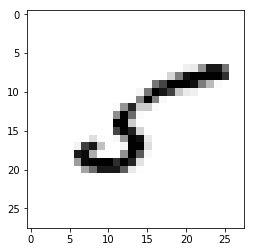

In [3]:
import tensorflow as tf
import numpy as np

mnist_digits = tf.keras.datasets.mnist


#mnist_digits.load_data()


(x_train, y_train), (x_test, y_test) = mnist_digits.load_data()

import matplotlib.pyplot as plt
%matplotlib inline 
# Only use this if using iPython
image_index = 11 
# You may select anything up to 60,000
print(y_train[image_index]) # The label is 8
plt.imshow(x_train[image_index], cmap='Greys')


## 2. Loading AlexNET

In [7]:
import tensorflow as tf
import numpy as np
from tensorflow.python.keras.layers.core import Dense, Activation
from tensorflow.python.keras import Sequential
from tensorflow.python.keras import optimizers
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, BatchNormalization, Flatten, Dropout


def create_and_train_mnist_alexnet(learning_rate, activation):
    mnist_digits = tf.keras.datasets.mnist
    (x_train, y_train), (x_test, y_test) = mnist_digits.load_data()
    img_shape = (28, 28)

    # print(x_train[0])
    print(x_train[0].shape)
    print(x_train.shape)

    x_train = np.expand_dims(x_train, 3)
    print(x_train.shape)

    y_train = np.expand_dims(y_train, 3)
    print(y_train[0].shape)

    # x_train = np.swapaxes(x_train,1,3)
    # print(x_train[0].shape)

    l2_reg = 0
    n_classes = 10
    alexnet = Sequential()

    # Layer 1
    alexnet.add(Conv2D(96, (11, 11), input_shape=x_train[0].shape,
                       padding='same', kernel_regularizer=l2(l2_reg)))
    alexnet.add(BatchNormalization())
    alexnet.add(Activation(activation))
    alexnet.add(MaxPooling2D(pool_size=(2, 2)))

    # Layer 2
    alexnet.add(Conv2D(256, (5, 5), padding='same'))
    alexnet.add(BatchNormalization())
    alexnet.add(Activation(activation))
    alexnet.add(MaxPooling2D(pool_size=(2, 2)))

    # Layer 3
    alexnet.add(ZeroPadding2D((1, 1)))
    alexnet.add(Conv2D(384, (3, 3), padding='same'))
    alexnet.add(BatchNormalization())
    alexnet.add(Activation(activation))
    alexnet.add(MaxPooling2D(pool_size=(2, 2)))

    # Layer 4
    alexnet.add(ZeroPadding2D((1, 1)))
    alexnet.add(Conv2D(384, (3, 3), padding='same'))
    alexnet.add(BatchNormalization())
    alexnet.add(Activation(activation))

    # Layer 5
    alexnet.add(ZeroPadding2D((1, 1)))
    alexnet.add(Conv2D(256, (3, 3), padding='same'))
    alexnet.add(BatchNormalization())
    alexnet.add(Activation(activation))
    alexnet.add(MaxPooling2D(pool_size=(2, 2)))

    # Layer 6
    alexnet.add(Flatten())
    alexnet.add(Dense(4096))
    alexnet.add(BatchNormalization())
    alexnet.add(Activation(activation))
    alexnet.add(Dropout(0.5))

    # Layer 7
    alexnet.add(Dense(4096))
    alexnet.add(BatchNormalization())
    alexnet.add(Activation(activation))
    alexnet.add(Dropout(0.5))

    # Layer 8
    alexnet.add(Dense(n_classes))
    alexnet.add(BatchNormalization())
    alexnet.add(Activation('softmax'))

    alexnet.summary()

    adam = optimizers.Adam(lr=learning_rate, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

    # (4) Compile
    alexnet.compile(loss='sparse_categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

    # (5) Train
    alexnet.fit(x_train, y_train, batch_size=2048, epochs=1, validation_split=0.2, shuffle=True)



## 3. Training The Mnist Data with AlexNET

In [8]:
create_and_train_mnist_alexnet(0.01, 'relu')

(28, 28)
(60000, 28, 28)
(60000, 28, 28, 1)
(1,)


/home/codegenius/DevOps/VirtualEnvs/deepEnv/lib/python3.5/site-packages/ipykernel_launcher.py:22: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 96)        11712     
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 96)        384       
_________________________________________________________________
activation_210 (Activation)  (None, 28, 28, 96)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 256)       614656    
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 256)       1024      
_________________________________________________________________
activation_211 (Activation)  (None, 14, 14, 256)       0         
__________

## 4. Increasing Dense Layer Parameter Size 

### 4.1 Creating Model

In [11]:
import tensorflow as tf
import numpy as np
from tensorflow.python.keras.layers.core import Dense, Activation
from tensorflow.python.keras import Sequential
from tensorflow.python.keras import optimizers
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, BatchNormalization, Flatten, Dropout


def create_and_train_mnist_alexnet_different_dense(learning_rate, activation, dense_layer_size):
    mnist_digits = tf.keras.datasets.mnist
    (x_train, y_train), (x_test, y_test) = mnist_digits.load_data()
    img_shape = (28, 28)

    # print(x_train[0])
    print(x_train[0].shape)
    print(x_train.shape)

    x_train = np.expand_dims(x_train, 3)
    print(x_train.shape)

    y_train = np.expand_dims(y_train, 3)
    print(y_train[0].shape)

    # x_train = np.swapaxes(x_train,1,3)
    # print(x_train[0].shape)

    l2_reg = 0
    n_classes = 10
    alexnet = Sequential()

    # Layer 1
    alexnet.add(Conv2D(96, (11, 11), input_shape=x_train[0].shape,
                       padding='same', kernel_regularizer=l2(l2_reg)))
    alexnet.add(BatchNormalization())
    alexnet.add(Activation(activation))
    alexnet.add(MaxPooling2D(pool_size=(2, 2)))

    # Layer 2
    alexnet.add(Conv2D(256, (5, 5), padding='same'))
    alexnet.add(BatchNormalization())
    alexnet.add(Activation(activation))
    alexnet.add(MaxPooling2D(pool_size=(2, 2)))

    # Layer 3
    alexnet.add(ZeroPadding2D((1, 1)))
    alexnet.add(Conv2D(384, (3, 3), padding='same'))
    alexnet.add(BatchNormalization())
    alexnet.add(Activation(activation))
    alexnet.add(MaxPooling2D(pool_size=(2, 2)))

    # Layer 4
    alexnet.add(ZeroPadding2D((1, 1)))
    alexnet.add(Conv2D(384, (3, 3), padding='same'))
    alexnet.add(BatchNormalization())
    alexnet.add(Activation(activation))

    # Layer 5
    alexnet.add(ZeroPadding2D((1, 1)))
    alexnet.add(Conv2D(256, (3, 3), padding='same'))
    alexnet.add(BatchNormalization())
    alexnet.add(Activation(activation))
    alexnet.add(MaxPooling2D(pool_size=(2, 2)))

    # Layer 6
    alexnet.add(Flatten())
    alexnet.add(Dense(dense_layer_size))
    alexnet.add(BatchNormalization())
    alexnet.add(Activation(activation))
    alexnet.add(Dropout(0.5))

    # Layer 7
    alexnet.add(Dense(dense_layer_size))
    alexnet.add(BatchNormalization())
    alexnet.add(Activation(activation))
    alexnet.add(Dropout(0.5))

    # Layer 8
    alexnet.add(Dense(n_classes))
    alexnet.add(BatchNormalization())
    alexnet.add(Activation('softmax'))

    alexnet.summary()

    adam = optimizers.Adam(lr=learning_rate, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

    # (4) Compile
    alexnet.compile(loss='sparse_categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

    # (5) Train
    #alexnet.fit(x_train, y_train, batch_size=2048, epochs=1, validation_split=0.2, shuffle=True)

### 4.3 Training With Different Parameters

In [12]:
create_and_train_mnist_alexnet_different_dense(0.1, 'relu', 4596)
create_and_train_mnist_alexnet_different_dense(0.1, 'relu', 5096)
create_and_train_mnist_alexnet_different_dense(0.1, 'relu', 5596)

create_and_train_mnist_alexnet_different_dense(0.1, 'tanh', 4596)
create_and_train_mnist_alexnet_different_dense(0.1, 'tanh', 5096)
create_and_train_mnist_alexnet_different_dense(0.1, 'tanh', 5596)

(28, 28)
(60000, 28, 28)
(60000, 28, 28, 1)
(1,)


/home/codegenius/DevOps/VirtualEnvs/deepEnv/lib/python3.5/site-packages/ipykernel_launcher.py:22: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 96)        11712     
_________________________________________________________________
batch_normalization_8 (Batch (None, 28, 28, 96)        384       
_________________________________________________________________
activation_218 (Activation)  (None, 28, 28, 96)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 96)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 256)       614656    
_________________________________________________________________
batch_normalization_9 (Batch (None, 14, 14, 256)       1024      
_________________________________________________________________
activation_219 (Activation)  (None, 14, 14, 256)       0         
__________

(28, 28)
(60000, 28, 28)
(60000, 28, 28, 1)
(1,)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 28, 28, 96)        11712     
_________________________________________________________________
batch_normalization_24 (Batc (None, 28, 28, 96)        384       
_________________________________________________________________
activation_234 (Activation)  (None, 28, 28, 96)        0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 14, 14, 96)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 14, 14, 256)       614656    
_________________________________________________________________
batch_normalization_25 (Batc (None, 14, 14, 256)       1024      
_________________________________________________________________
activation_235 (Activation)

(28, 28)
(60000, 28, 28)
(60000, 28, 28, 1)
(1,)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 28, 28, 96)        11712     
_________________________________________________________________
batch_normalization_40 (Batc (None, 28, 28, 96)        384       
_________________________________________________________________
activation_250 (Activation)  (None, 28, 28, 96)        0         
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 14, 14, 96)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 14, 14, 256)       614656    
_________________________________________________________________
batch_normalization_41 (Batc (None, 14, 14, 256)       1024      
_________________________________________________________________
activation_251 (Activation)

### 4.4 Removing Third Layer

In [17]:
import tensorflow as tf
import numpy as np
from tensorflow.python.keras.layers.core import Dense, Activation
from tensorflow.python.keras import Sequential
from tensorflow.python.keras import optimizers
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, BatchNormalization, Flatten, Dropout


def create_and_train_mnist_alexnet_different_dense(learning_rate, activation, dense_layer_size):
    mnist_digits = tf.keras.datasets.mnist
    (x_train, y_train), (x_test, y_test) = mnist_digits.load_data()
    img_shape = (28, 28)

    # print(x_train[0])
    print(x_train[0].shape)
    print(x_train.shape)

    x_train = np.expand_dims(x_train, 3)
    print(x_train.shape)

    y_train = np.expand_dims(y_train, 3)
    print(y_train[0].shape)

    # x_train = np.swapaxes(x_train,1,3)
    # print(x_train[0].shape)

    l2_reg = 0
    n_classes = 10
    alexnet = Sequential()

    # Layer 1
    alexnet.add(Conv2D(96, (11, 11), input_shape=x_train[0].shape,
                       padding='same', kernel_regularizer=l2(l2_reg)))
    alexnet.add(BatchNormalization())
    alexnet.add(Activation(activation))
    alexnet.add(MaxPooling2D(pool_size=(2, 2)))

    # Layer 2
    alexnet.add(Conv2D(256, (5, 5), padding='same'))
    alexnet.add(BatchNormalization())
    alexnet.add(Activation(activation))
    alexnet.add(MaxPooling2D(pool_size=(2, 2)))

    #REMOVE
    # Layer 3
    #alexnet.add(ZeroPadding2D((1, 1)))
    #alexnet.add(Conv2D(384, (3, 3), padding='same'))
    #alexnet.add(BatchNormalization())
    #alexnet.add(Activation(activation))
    #alexnet.add(MaxPooling2D(pool_size=(2, 2)))

    # Layer 4
    alexnet.add(ZeroPadding2D((1, 1)))
    alexnet.add(Conv2D(384, (3, 3), padding='same'))
    alexnet.add(BatchNormalization())
    alexnet.add(Activation(activation))

    # Layer 5
    alexnet.add(ZeroPadding2D((1, 1)))
    alexnet.add(Conv2D(256, (3, 3), padding='same'))
    alexnet.add(BatchNormalization())
    alexnet.add(Activation(activation))
    alexnet.add(MaxPooling2D(pool_size=(2, 2)))

    # Layer 6
    alexnet.add(Flatten())
    alexnet.add(Dense(dense_layer_size))
    alexnet.add(BatchNormalization())
    alexnet.add(Activation(activation))
    alexnet.add(Dropout(0.5))

    # Layer 7
    alexnet.add(Dense(dense_layer_size))
    alexnet.add(BatchNormalization())
    alexnet.add(Activation(activation))
    alexnet.add(Dropout(0.5))

    # Layer 8
    alexnet.add(Dense(n_classes))
    alexnet.add(BatchNormalization())
    alexnet.add(Activation('softmax'))

    alexnet.summary()

    adam = optimizers.Adam(lr=learning_rate, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

    # (4) Compile
    alexnet.compile(loss='sparse_categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

    # (5) Train
    #alexnet.fit(x_train, y_train, batch_size=2048, epochs=1, validation_split=0.2, shuffle=True)

In [18]:
create_and_train_mnist_alexnet_different_dense(0.1, 'relu', 5096)
create_and_train_mnist_alexnet_different_dense(0.1, 'tanh', 5096)
create_and_train_mnist_alexnet_different_dense(0.01, 'relu', 5096)

(28, 28)
(60000, 28, 28)
(60000, 28, 28, 1)
(1,)


/home/codegenius/DevOps/VirtualEnvs/deepEnv/lib/python3.5/site-packages/ipykernel_launcher.py:22: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_42 (Conv2D)           (None, 28, 28, 96)        11712     
_________________________________________________________________
batch_normalization_69 (Batc (None, 28, 28, 96)        384       
_________________________________________________________________
activation_279 (Activation)  (None, 28, 28, 96)        0         
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 14, 14, 96)        0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 14, 14, 256)       614656    
_________________________________________________________________
batch_normalization_70 (Batc (None, 14, 14, 256)       1024      
_________________________________________________________________
activation_280 (Activation)  (None, 14, 14, 256)       0         
__________

### 4.5 Removing Third and Fourth Layer

In [15]:
import tensorflow as tf
import numpy as np
from tensorflow.python.keras.layers.core import Dense, Activation
from tensorflow.python.keras import Sequential
from tensorflow.python.keras import optimizers
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, BatchNormalization, Flatten, Dropout


def create_and_train_mnist_alexnet_different_dense(learning_rate, activation, dense_layer_size):
    mnist_digits = tf.keras.datasets.mnist
    (x_train, y_train), (x_test, y_test) = mnist_digits.load_data()
    img_shape = (28, 28)

    # print(x_train[0])
    print(x_train[0].shape)
    print(x_train.shape)

    x_train = np.expand_dims(x_train, 3)
    print(x_train.shape)

    y_train = np.expand_dims(y_train, 3)
    print(y_train[0].shape)

    # x_train = np.swapaxes(x_train,1,3)
    # print(x_train[0].shape)

    l2_reg = 0
    n_classes = 10
    alexnet = Sequential()

    # Layer 1
    alexnet.add(Conv2D(96, (11, 11), input_shape=x_train[0].shape,
                       padding='same', kernel_regularizer=l2(l2_reg)))
    alexnet.add(BatchNormalization())
    alexnet.add(Activation(activation))
    alexnet.add(MaxPooling2D(pool_size=(2, 2)))

    # Layer 2
    alexnet.add(Conv2D(256, (5, 5), padding='same'))
    alexnet.add(BatchNormalization())
    alexnet.add(Activation(activation))
    alexnet.add(MaxPooling2D(pool_size=(2, 2)))

    #REMOVE
    # Layer 3
    #alexnet.add(ZeroPadding2D((1, 1)))
    #alexnet.add(Conv2D(384, (3, 3), padding='same'))
    #alexnet.add(BatchNormalization())
    #alexnet.add(Activation(activation))
    #alexnet.add(MaxPooling2D(pool_size=(2, 2)))

    # Layer 4
    #alexnet.add(ZeroPadding2D((1, 1)))
    #alexnet.add(Conv2D(384, (3, 3), padding='same'))
    #alexnet.add(BatchNormalization())
    #alexnet.add(Activation(activation))

    # Layer 5
    alexnet.add(ZeroPadding2D((1, 1)))
    alexnet.add(Conv2D(256, (3, 3), padding='same'))
    alexnet.add(BatchNormalization())
    alexnet.add(Activation(activation))
    alexnet.add(MaxPooling2D(pool_size=(2, 2)))

    # Layer 6
    alexnet.add(Flatten())
    alexnet.add(Dense(dense_layer_size))
    alexnet.add(BatchNormalization())
    alexnet.add(Activation(activation))
    alexnet.add(Dropout(0.5))

    # Layer 7
    alexnet.add(Dense(dense_layer_size))
    alexnet.add(BatchNormalization())
    alexnet.add(Activation(activation))
    alexnet.add(Dropout(0.5))

    # Layer 8
    alexnet.add(Dense(n_classes))
    alexnet.add(BatchNormalization())
    alexnet.add(Activation('softmax'))

    alexnet.summary()

    adam = optimizers.Adam(lr=learning_rate, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

    # (4) Compile
    alexnet.compile(loss='sparse_categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

    # (5) Train
    #alexnet.fit(x_train, y_train, batch_size=2048, epochs=1, validation_split=0.2, shuffle=True)

In [16]:
create_and_train_mnist_alexnet_different_dense(0.1, 'relu', 5596)
create_and_train_mnist_alexnet_different_dense(0.1, 'tanh', 5596)
create_and_train_mnist_alexnet_different_dense(0.01, 'relu', 5596)

(28, 28)
(60000, 28, 28)
(60000, 28, 28, 1)
(1,)


/home/codegenius/DevOps/VirtualEnvs/deepEnv/lib/python3.5/site-packages/ipykernel_launcher.py:22: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_39 (Conv2D)           (None, 28, 28, 96)        11712     
_________________________________________________________________
batch_normalization_63 (Batc (None, 28, 28, 96)        384       
_________________________________________________________________
activation_273 (Activation)  (None, 28, 28, 96)        0         
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 14, 14, 96)        0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 14, 14, 256)       614656    
_________________________________________________________________
batch_normalization_64 (Batc (None, 14, 14, 256)       1024      
_________________________________________________________________
activation_274 (Activation)  (None, 14, 14, 256)       0         
__________

## Results

Training the AlexNET on my computer with cpu is taking too time. That's why I choose epoch as just 1. With default parameters, it took 15mins~


I couldn't fill all the matrix but I implemented the models. Here is the results:

| Training Data Size | Test Data Size |           Input Node          | Hidden Activation | Dense-1 | Dense-2 | Param Size | Epoch | L.Rate | Train Error | Train Accuracy | Test Error | Test Accuracy |
|:------------------:|:--------------:|:-----------------------------:|:-----------------:|:-------:|:-------:|:----------:|:-----:|:------:|:-----------:|:--------------:|:----------:|:-------------:|
|        48000       |      12000     |              784              |        relu       |   4096  |   4096  | 37,365,874 |   1   |  0.01  |    1.2084   |     0.6586     |   14.5117  |     0.0997    |
|        48000       |      12000     |              784              |        relu       |   4096  |   4096  | 37,365,874 |   1   |   0.1  |    1.6354   |     0.4397     |   13.4288  |     0.1667    |
|        48000       |      12000     |              784              |        relu       |   4096  |   4096  | 37,365,874 |   1   |   0.2  |      x      |        x       |      x     |       x       |
|        48000       |      12000     |              784              |        relu       |   4596  |   4596  | 43,769,874 |   1   |   0.1  |      x      |        x       |      x     |       x       |
|        48000       |      12000     |              784              |        relu       |   5096  |   5096  | 50,673,874 |   1   |   0.1  |      x      |        x       |      x     |       x       |
|        48000       |      12000     |              784              |        relu       |   5596  |   5596  | 58,077,874 |   1   |   0.1  |      x      |        x       |      x     |       x       |
|        48000       |      12000     |              784              |        tanh       |   4596  |   4596  | 43,769,874 |   1   |   0.1  |      x      |        x       |      x     |       x       |
|        48000       |      12000     |              784              |        tanh       |   5096  |   5096  | 50,673,874 |   1   |   0.1  |      x      |        x       |      x     |       x       |
|        48000       |      12000     |              784              |        tanh       |   5596  |   5596  | 58,077,874 |   1   |   0.1  |      x      |        x       |      x     |       x       |
|        48000       |      12000     |     784 - 3. Layer Removed    |        relu       |   5096  |   5096  | 61,086,034 |   1   |   0.1  |      x      |        x       |      x     |       x       |
|        48000       |      12000     | 784 - 3. and 4. Layer Removed |        relu       |   5596  |   5596  | 55,567,282 |   1   |   0.1  |      x      |        x       |      x     |       x       |



## Comments

I must use gpu for faster results. As soon as possible I'll buy an Nvidia Gpu. For using mnist data on alexnet we must change the channels and dimensions. AlexNet is (227,227,1) for mnist it is (28,28,1).

Using 0.01 as learning rate given better result than 0.1.

I will try the matrix's other rows after sending this report.